# Text Mining Project 

Docs for orgaization: https://docs.google.com/document/d/1cU9rkjof2L1qmxQwBYIpzOMezUiTN0xATmCpiLne1_c/edit?usp=sharing

Link for report: https://liveeduisegiunl-my.sharepoint.com/:w:/g/personal/20230568_novaims_unl_pt/Ee5Xaa2zAJtOj_6C7T8apkgB3_gYWxfbe4SQxlCq9Ld0PA?e=YFEFAF

### Goal: 
**Implement an NLP Classification model able to predict, for each property, if it was unlisted (1) in the next quarter or is still listed (0)**


### Import Libraries / Dataset:

#### **Libraries**:

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud 

#### **Dataset:**

Start by importing the train and test sets:

In [62]:
airbnb_df_train = pd.read_excel('Project Corpora/train.xlsx')
airbnb_df_train_reviews = pd.read_excel('Project Corpora/train_reviews.xlsx')
airbnb_df_test= pd.read_excel('Project Corpora/test.xlsx')
airbnb_df_test_reviews = pd.read_excel('Project Corpora/test_reviews.xlsx')

In [63]:
airbnb_df_train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


**airbnb_df_train** contains info regarding each listing's *description* and *host_about*, as weel as a "target" variable *unlisted* that tells us if a property was unlisted (1) or not (0).

In [64]:
airbnb_df_train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


**airbnb_df_train_reviews** contains infor regrading *comments* about listings. We know from the begining that:
- There can be more than one comment per listing;
- Not all properties have comments;
- Comments can appear in many languages;

----

### Data Exploration:

#### **airbnb_df_train/test**

We start by checking if the indexes in *airbnb_df_train* are unique:

In [65]:
airbnb_df_train['index'].value_counts()

1       1
4150    1
4172    1
4171    1
4170    1
       ..
2081    1
2080    1
2079    1
2078    1
6248    1
Name: index, Length: 6248, dtype: int64

There are no duplicated indexes and so the column *"index"* can be turned into the index of the dataframe:

In [66]:
airbnb_df_train.set_index('index', inplace = True)
airbnb_df_train.head()

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [67]:
airbnb_df_test['index'].value_counts()

1      1
468    1
460    1
461    1
462    1
      ..
234    1
235    1
236    1
237    1
695    1
Name: index, Length: 695, dtype: int64

Same thing is done for the test set:

In [68]:
airbnb_df_test.set_index('index', inplace = True)
airbnb_df_test.head()

,description,host_about
index,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
4,Charming Apartment Close to the Bay of Cascais...,:)
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


We then check for the size of our datasets:

In [69]:
airbnb_df_train.shape, airbnb_df_test.shape

((6248, 3), (695, 2))

We have **6248** listings in the train dataset and **695** on the test.

In [70]:
airbnb_df_train_reviews.shape, airbnb_df_test_reviews.shape

((361281, 2), (41866, 2))

We have **361281** reviews in train and **41866** in test.

This shows that the variable *comments* contains a lot more information than other variables. We now need to understand if this information is revelant /coherent for the problem.

In [71]:
airbnb_df_train.duplicated().sum()

192

There are also **192** duplicated entries in the train set.

 **NOTE:** 
- We will treat duplicated entries as different properties (as per indication of teachers).
- All our text fields have text in different languages (Portuguese, English, French...);

#### **unlisted:**

We start by exploring the target variable:

In [72]:
airbnb_df_train['unlisted'].describe()

count    6248.000000
mean        0.273367
std         0.445724
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: unlisted, dtype: float64

We have **no mising values** for the target.

In [73]:
airbnb_df_train['unlisted'].unique()

array([0, 1])

There are no unexpected values for the target.

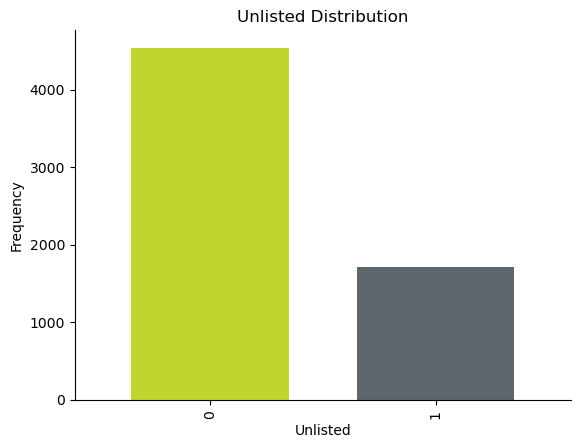

In [74]:
airbnb_df_train['unlisted'].value_counts().plot(kind='bar', color=['#BED62F', '#5C666C'], width = 0.7 )
plt.grid(False)
plt.title('Unlisted Distribution')
plt.xlabel('Unlisted')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [75]:
airbnb_df_train['unlisted'].value_counts(normalize=True)*100

0    72.663252
1    27.336748
Name: unlisted, dtype: float64

There is a clear **unbalance** in the target variable: around 73% of the training instances represent airbnb's that remain listed, while only 27% represent airbnb's that were unlisted.

This is an important characteristic of the data, as unbalanced data needs to be adressed so it does not affect the performance of our classification models.

#### **description:**

In [76]:
airbnb_df_train['description'].isna().sum()

0

In [77]:
airbnb_df_train['description'].duplicated().sum()

225

There are **no missing values** for this varible, but we note that there are **duplicated descriptions**.

##### Turn text into words to better analyse it:

##### **WORD COUNT:**

Turning our descriptions into tokens and counting how many tokens exist in each description:

In [93]:
airbnb_df_train['word_count_descr']  = airbnb_df_train['description'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['description','word_count_descr']].head() #number of tokens

,description,word_count_descr
index,,
1,"This is a shared mixed room in our hostel, wit...",127
2,"O meu espaço fica perto de Parque Eduardo VII,...",23
3,Trafaria’s House is a cozy and familiar villa ...,170
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",47
5,Joli appartement en bordure de mer.<br /> 2 m...,101


In [81]:
airbnb_df_train.word_count_descr.describe().round(2)

count    6248.00
mean      132.86
std        48.08
min         3.00
25%        99.00
50%       157.00
75%       167.00
max       210.00
Name: word_count_descr, dtype: float64

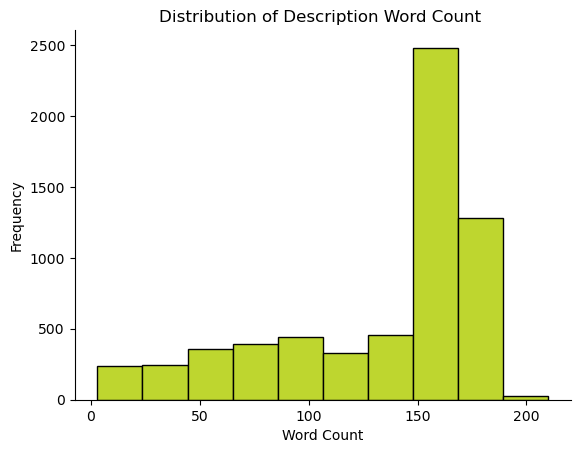

In [98]:
airbnb_df_train['word_count_descr'].hist(ec = 'black', color=['#BED62F'])
plt.grid(False)  
plt.title('Distribution of Description Word Count ')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

The **descripiton** filed contains text with many different sizes, by is most commonly around [150,170] words.

##### **WORD ANALYSIS:**

We now analyse each word individually:

In [103]:
all_words_descr = ' '.join(airbnb_df_train['description']).split()

In [104]:
freq_descr = pd.Series(all_words_descr).value_counts() #see frequency of words

Cheking the most common words:

In [111]:
freq_descr.sort_values(ascending=False)[0:25]

the             31323
and             27698
a               25540
/><br           17380
to              15328
of              15122
in              13866
with            13649
is              12083
de               6918
apartment        6841
for              6153
you              6140
<br              5328
has              4863
space</b><br     4814
/><b>The         4670
from             4363
e                4288
/>The            4144
The              3426
are              3155
room             3016
located          2944
2                2937
dtype: int64

Vizualising using a barplot:

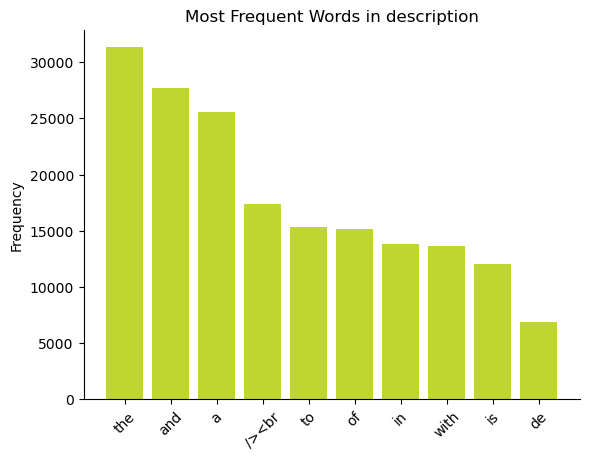

In [119]:
x_labels = freq_descr.index[0:10]
values = freq_descr[:10]
plt.bar(x_labels, values, color=['#BED62F'] )
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words in description')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

Visualizing using a word cloud:

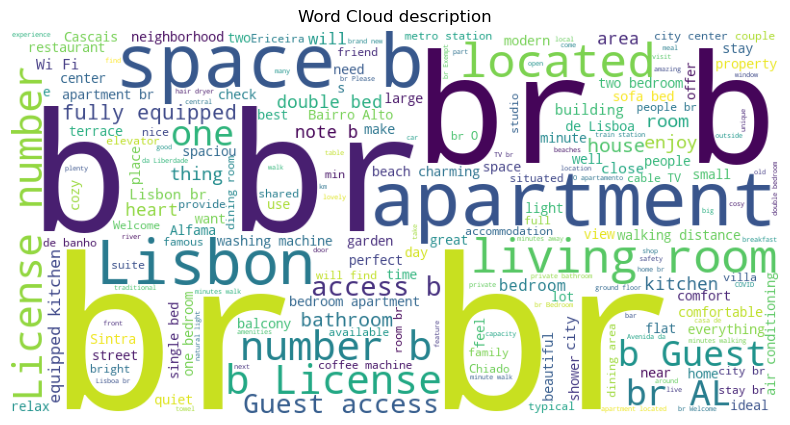

In [134]:
# Joining all the descriptions into a single string
all_reviews_descr = ' '.join(airbnb_df_train['description'])
    
# Create WordCloud object
wordcloud_descr = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_descr)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_descr)
plt.axis("off")
plt.title('Word Cloud description')
plt.show()

There are clearly a lot of uniformative words that can be considered stop words, tags or non-alphanumeric, such as 'br', 'and' 'the'.\
These word should be correctly pre-processed as to not affect the outcome of our final analysis.

#### **host_about:**

In [50]:
airbnb_df_train['host_about'].isna().sum()

0

In [53]:
airbnb_df_train['host_about'].duplicated().sum()

3445

Once again, there are **no missing values** but we have many **duplicated hosts**, which is expected as a host can have more than one listing.

##### Turn text into words to better analyse it:

##### **WORD COUNT:**

Turning our descriptions into tokens and counting how many tokens exist in each description:

In [94]:
airbnb_df_train['word_count_host']  = airbnb_df_train['host_about'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['host_about','word_count_host']].head() #number of tokens

,host_about,word_count_host
index,,
1,Alojamento Local Registro: 20835/AL,4
2,"I am friendly host, and I will try to always b...",24
3,"I am a social person liking to communicate, re...",45
4,Hello!_x000D_\nI m Portuguese and i love to me...,31
5,Nous sommes une famille avec deux enfants de 1...,37


In [97]:
airbnb_df_train.word_count_host.describe().round(2)

count    6248.00
mean       73.65
std        79.66
min         1.00
25%        26.00
50%        55.00
75%       101.00
max      1387.00
Name: word_count_host, dtype: float64

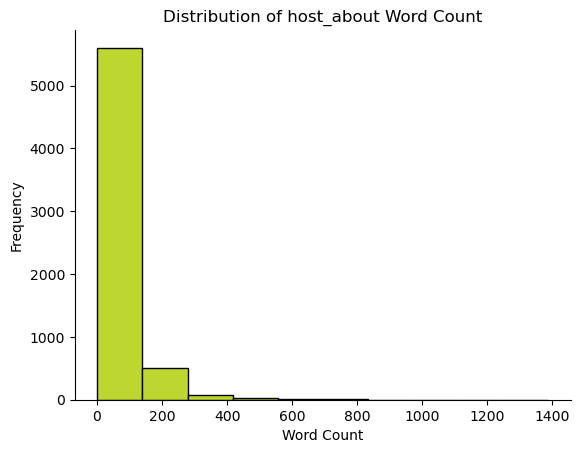

In [99]:
airbnb_df_train['word_count_host'].hist(ec = 'black', color=['#BED62F'])
plt.grid(False)  
plt.title('Distribution of host_about Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

The *host_about* filed has generally smaller text [0,100] words, but also has extreme outliers with 10 times more words.

##### **WORD ANALYSIS:**

We now analyse each word individually:

In [123]:
all_words_host= ' '.join(airbnb_df_train['host_about']).split()

In [124]:
freq_host = pd.Series(all_words_host).value_counts() #see frequency of words

Cheking the most common words:

In [127]:
freq_host.sort_values(ascending=False)[0:20]

and        16358
to         13291
the        10797
a          10535
in          9860
of          6524
I           6419
you         6248
de          4325
We          4206
our         4004
e           3980
_x000D_     3971
for         3864
with        3819
is          3506
we          3481
are         2929
have        2825
my          2750
dtype: int64

Vizualising using a barplot:

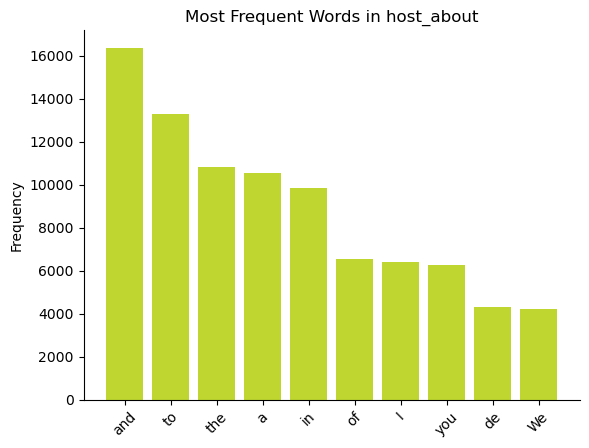

In [130]:
x_labels = freq_host.index[0:10]
values = freq_host[:10]
plt.bar(x_labels, values, color=['#BED62F'] )
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words in host_about')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

Visualizing using a word cloud:

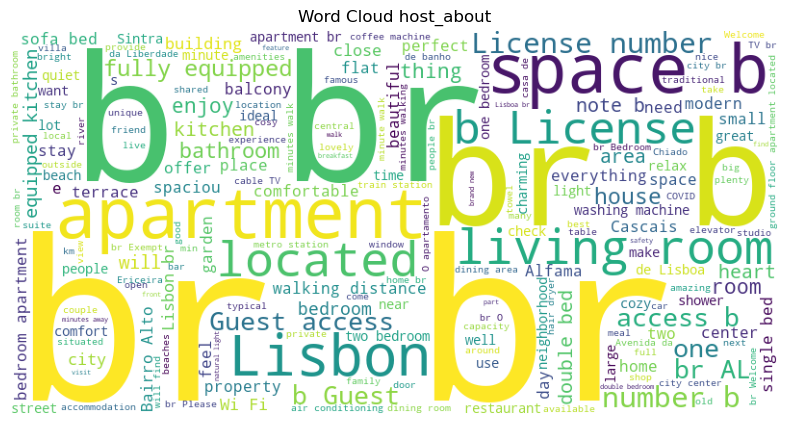

In [133]:
# Joining all the host_about into a single string
all_reviews_host = ' '.join(airbnb_df_train['host_about'])
    
# Create WordCloud object
wordcloud_descr = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_descr)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_descr)
plt.axis("off")
plt.title('Word Cloud host_about')
plt.show()

There are clearly a lot of uniformative words that can be considered stop words, tags or non-alphanumeric, such as 'br', 'and' 'to'.\
These word should be correctly pre-processed as to not affect the outcome of our final analysis.

#### **comments:**

In [54]:
airbnb_df_train_reviews['comments'].isna().sum()

0

In [55]:
airbnb_df_train_reviews['comments'].duplicated().sum()

6781

The same thing occurs for the *comments*: there are **no missing values** but we have **many duplicated values**.

##### Turn text into words to better analyse it:

##### **WORD COUNT:**

Turning our descriptions into tokens and counting how many tokens exist in each description:

In [96]:
airbnb_df_train_reviews['word_count_rev']  = airbnb_df_train_reviews['comments'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train_reviews[['comments','word_count_rev']].head() #number of tokens

,comments,word_count_rev
0,this is a very cozy and comfortable house to s...,28
1,good<br/>,1
2,"My first hostel experience, and all I have to ...",261
3,Das Hostel war neu und deshalb funktionierte a...,81
4,"It was fine for a dorm, but I think for the pe...",27


In [100]:
airbnb_df_train_reviews.word_count_rev.describe().round(2)

count    361281.00
mean         47.97
std          46.79
min           1.00
25%          18.00
50%          36.00
75%          63.00
max        1019.00
Name: word_count_rev, dtype: float64

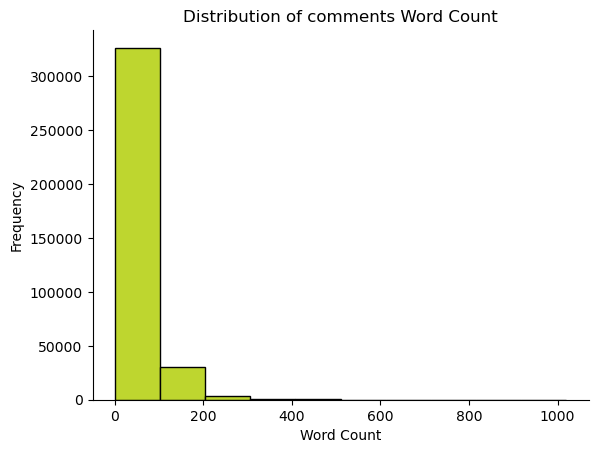

In [101]:
airbnb_df_train_reviews['word_count_rev'].hist(ec = 'black', color=['#BED62F'])
plt.grid(False)  
plt.title('Distribution of comments Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Just as with *host_about*, most *comments* have around [1,63] words but some outliers are 10 times bigger.

##### **WORD ANALYSIS:**

We now analyse each word individually:

In [122]:
all_words_rev= ' '.join(airbnb_df_train_reviews['comments']).split()

In [125]:
freq_rev = pd.Series(all_words_rev).value_counts() #see frequency of words

Cheking the most common words:

In [129]:
freq_rev.sort_values(ascending=False)[0:15]

and          553157
the          515963
a            398631
to           328675
is           258191
in           249469
was          239807
of           174087
very         156654
The          143987
for          141658
de           139290
with         115782
apartment    114848
we            98283
dtype: int64

Vizualising using a barplot:

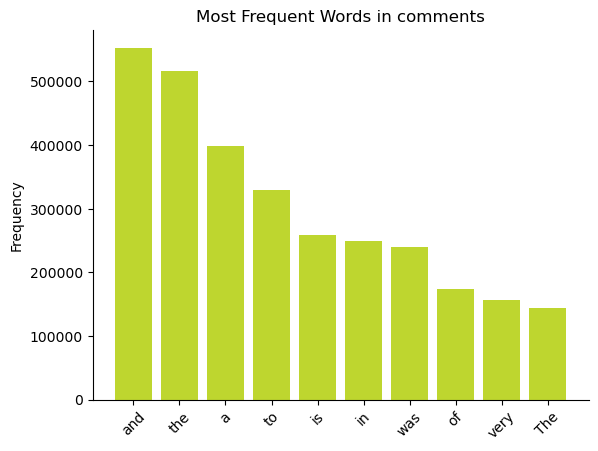

In [131]:
x_labels = freq_rev.index[0:10]
values = freq_rev[:10]
plt.bar(x_labels, values, color=['#BED62F'] )
plt.xticks(x_labels)
plt.ylabel('Frequency')
plt.title('Most Frequent Words in comments')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation = 45)
plt.show()

Visualizing using a word cloud:

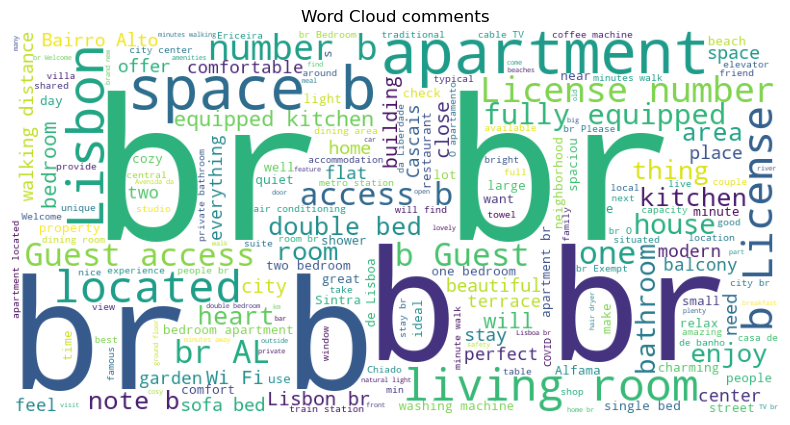

In [135]:
# Joining all the comments into a single string
all_reviews_rev = ' '.join(airbnb_df_train_reviews['comments'])
    
# Create WordCloud object
wordcloud_descr = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_descr)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_descr)
plt.axis("off")
plt.title('Word Cloud comments')
plt.show()

There are clearly a lot of uniformative words that can be considered stop words, tags or non-alphanumeric, such as 'br', 'and' 'the'.\
These word should be correctly pre-processed as to not affect the outcome of our final analysis.

##### **Conclusions:**
- Target variable *unlisted* is unbalaned (73/27);
- Text fields appear in many languages;
- Duplicated entries will be considered different properties;
- All text fileds have many stop words, tags and non-alphanumeric words that should be removed for a better analysis.


**By the end of topic we should have:**
- Analyze the corpora; 
- Provide Conclusions;
- Provide Visual Information (bar chart, word cloud…) with context;

There are no extra points.


Reference: 
- https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data
- https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
- https://spotintelligence.com/2023/09/15/exploratory-data-analysis-nlp/

------

### Data Pre-Processing:

- Split Training corpus intro train/validation sets (or also K-Fold Cross Validation or others);
- Implement at least 4 preprocessing techniques (stop words, regular expressions, lemmatization, stemming, …)
- Apply more data exploration after preprocessing.

Extra work: 0.25 points for each extra method (unseen in class) - max 2 methods



1. Normalization:
- Replace links with special token
- Normalize dates
- Regular expressions

2. LowerCasing

3. Tokenization
- Coumpounds
- Punctuation
4. Remove Stop-Words

5. Stemming and lemmatisation
6. POS filtering


----

### Feature Engineering:
Implement and experiment with 2 of feature engineering techniques (TF-IDF, GloVe embedding, …).

Extra work: 1 point for each extra method using Transformed-based embedding.- max 2 methods



-----

### Classification Models:
Implement and test 3 of the classification algorithms seen in class (KNN, LR, MLP, LSTM, …).

Extra work: 1 point for each extra model using Transformers or other advanced models - max 2 methods.



- Use KNN as baseline

----

### Evaluation:
Evaluate with, at least, Recall, Precision, Accuracy and F1-Score.
